In [11]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot

A vacinação rápida e eficiente é a melhor arma contra a pandemia. Desse modo vamos tentar prever como se dará a evolução da campanha de vacinação no Espírito Santo.

# Previsão da velocidade de vacinação com a primeira dose no Espírito Santo

In [12]:
vacina_dose_1 = pd.read_csv('C:/Users/Gabriel/Desktop/Projeto_M3//Dados_limpos/vacina_dose_1_agrupada_limpa.csv', sep=',')
vacina_dose_1['DataAplicacao'] = pd.to_datetime(vacina_dose_1['DataAplicacao'],format='%Y-%m-%d')


In [13]:
previsao_1 = pd.DataFrame()
previsao_1['ds'] = vacina_dose_1['DataAplicacao'][:140]
previsao_1['y'] = vacina_dose_1['Porcentagem da população'][:140]


In [15]:
modelo = Prophet( changepoint_range=0.95, changepoint_prior_scale=0.05, seasonality_mode='multiplicative',  weekly_seasonality=7) 
# Para que todas as mudanças de padrao fossem levadas em contata o valor de changepoint_range foi elevado para 0.95
modelo.add_country_holidays(country_name='BR')
modelo.fit(previsao_1)
datafranefuturo = modelo.make_future_dataframe(periods=30)
#Previsooes maiores que 30 dias estavam sujeitas a muitos erros. 
previsao = modelo.predict(datafranefuturo)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [16]:
df_teste = pd.DataFrame()
df_teste['ds'] = vacina_dose_1['DataAplicacao'][140:]
df_teste['y'] = vacina_dose_1['Porcentagem da população'][140:]

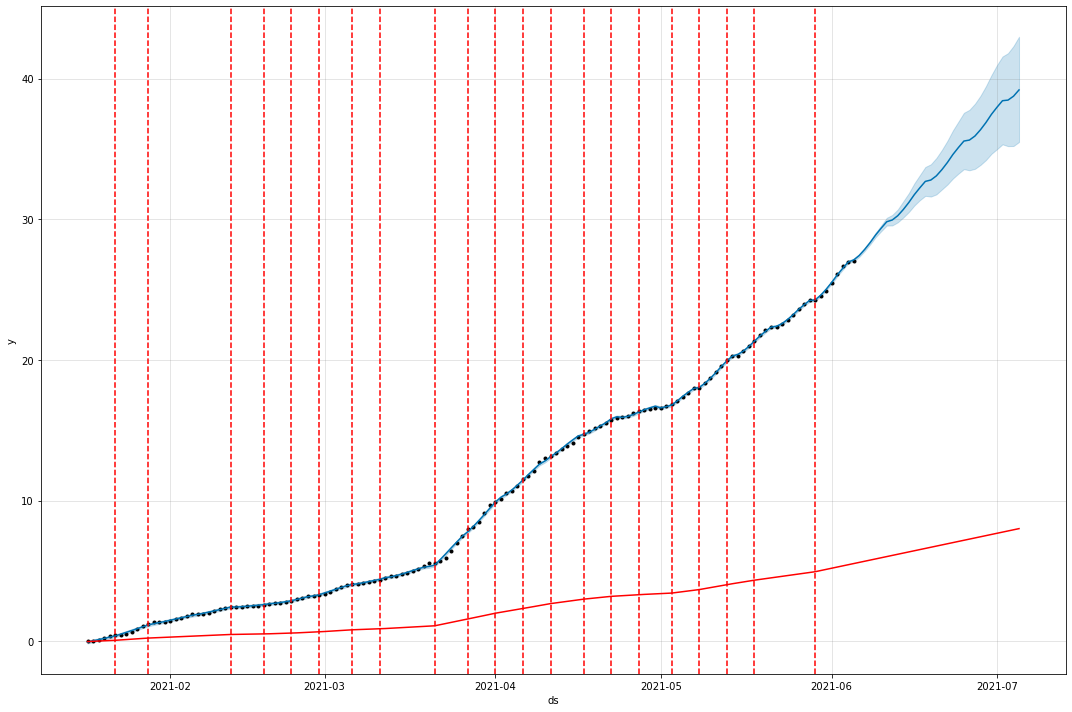

In [17]:
fig = modelo.plot(previsao, figsize=(15,10))
a = add_changepoints_to_plot(fig.gca(),modelo, previsao)

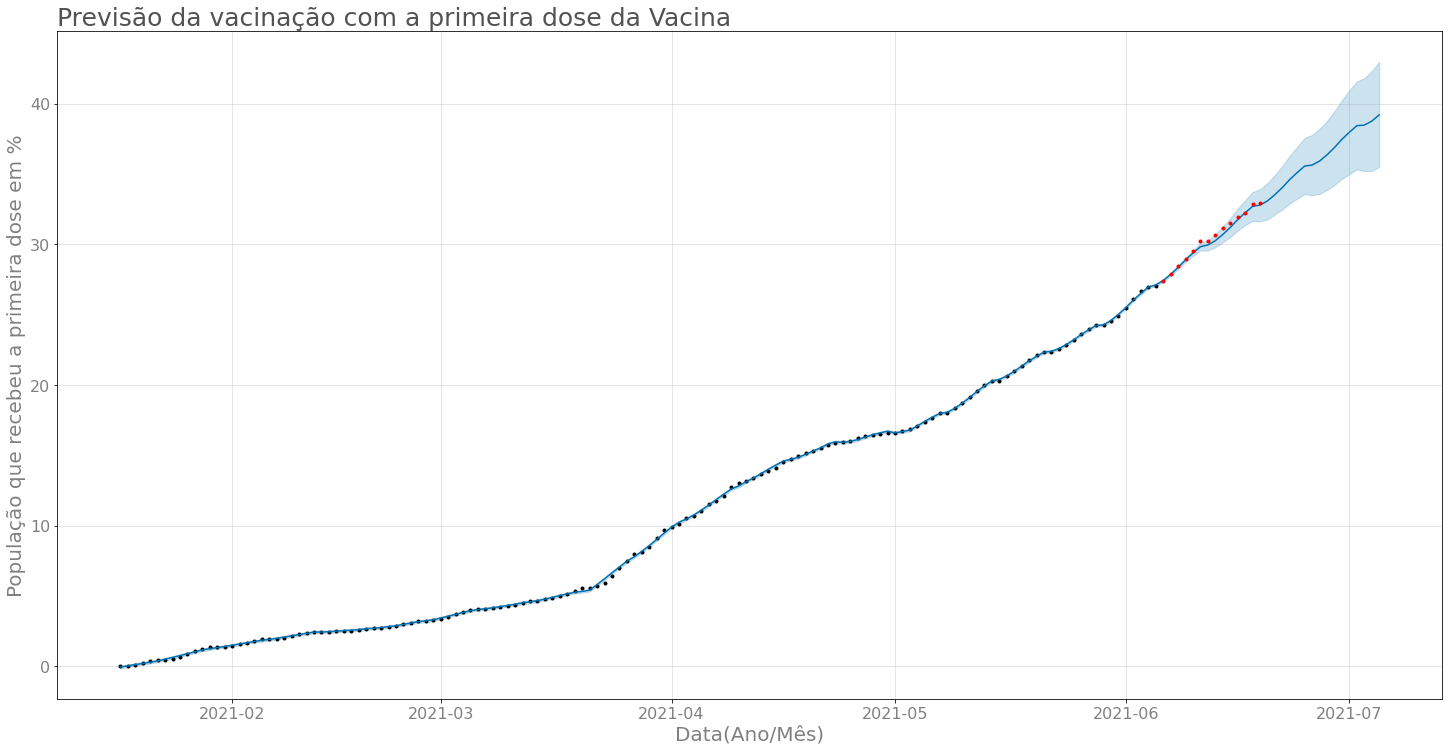

In [18]:
#plotando os resultados
modelo.plot(previsao, xlabel='DataAplicacao', ylabel= 'ES', figsize=(20,10)); 
plt.plot(df_teste['ds'], df_teste['y'], '.r')

#setado titulo e tickers
plt.title('Previsão da vacinação com a primeira dose da Vacina', loc = 'left', fontsize = 25, color = '#525252')
plt.xticks(fontsize=16, rotation=360, color='#808080')
plt.yticks(fontsize=16, color='#808080')
plt.xlabel('Data(Ano/Mês)', fontsize=20, color='#808080')
plt.ylabel('População que recebeu a primeira dose em %', fontsize=20, color='#808080')
plt.show()

Assim, conseguimos criar um modelo com um bom desempenho. Contudo, a vacinação pode ser influenciada por diversos fatores, o principal deles a falta de insumos. Além disso, a ocorrência de mutirões ou grandes esquemas de vacinação em curto espaço de tempo podem influenciar no sucesso da vacinação. 

Desse modo, nosso modelo funciona como um indicador de velocidade de imunização da população caso as condições atuais sejam mantidas. 
